In [4]:
class Node(object):
    
    def __init__(self,key,val):
        self.key= key
        self.val= val
        self.left_child= None
        self.right_child = None
    
def maxTree(node):
        if not node:
            return float("-inf")
       
        max_left = maxTree(node.left_child)
        max_right = maxTree(node.right_child)
        return max(max_left,node.key,max_right)
        
        
def minTree(node):
        if not node:
            return float("inf")
       
        min_left = minTree(node.left_child)
        min_right = minTree(node.right_child)
        return min(min_left,node.key,min_right)
    
def verify(node):
        if not node:
            return True
        
        if(maxTree(node.left_child) < node.key < minTree(node.right_child) and\
          verify(node.left_child) and verify(node.right_child)):
            return True
        else:
            return False
        
            
        

In [3]:
root= Node(30,"thirty")
root.left_child = Node(15, "Fifteen")
root.right_child= Node(35, "Thirtyfive")
root.left_child.left_child = Node(12, "Twelev")
root.left_child.right_child= Node(37, "thirtysevenn")
root.right_child.left_child = Node(32, "Thirtytwo")
root.right_child.right_child= Node(37, "Seventeen")


In [36]:
verify(root)

False

In [51]:
def height(node): 
    if node is None: 
        return 0 
    else : 
        # Compute the height of each subtree  
        lheight = height(node.left_child) 
      #  print("lheight",lheight,node.key)
        rheight = height(node.right_child) 
      #  print("rheight",lheight,node.key)
  
        #Use the larger one 
        if lheight > rheight : 
      #      print("in if",lheight+1)
            return lheight+1
        else: 
       #     print("in else",rheight+1)
            return rheight+1

In [20]:
height(root)

lheight 0 12
rheight 0 12
in else 1
lheight 1 15
lheight 0 37
rheight 0 37
in else 1
rheight 1 15
in else 2
lheight 2 30
lheight 0 32
rheight 0 32
in else 1
lheight 1 35
lheight 0 37
rheight 0 37
in else 1
rheight 1 35
in else 2
rheight 2 30
in else 3


3

In [21]:
# Print nodes at a given level 
def printGivenLevel(root , level): 
    if root is None: 
        return
    if level == 1: 
        print(root.key,end=" ") 
    elif level > 1 : 
        printGivenLevel(root.left_child , level-1) 
        printGivenLevel(root.right_child , level-1)

In [50]:
# Function to  print level order traversal of tree 
def printLevelOrder(root): 
    h = height(root) 
    for i in range(1, h+1): 
        printGivenLevel(root, i) 

In [25]:
printLevelOrder(root)

30 15 35 12 37 32 37 

In [37]:
import collections 
nodes = collections.deque([root])
print(len(nodes))
currentnode = nodes.popleft()
print(currentnode.key)

1
30


### left visible node count

count of nodees at extreme left
this is equivalent to height 

In [41]:
import collections 
def countLeftNodes(node):
    
    if not node:
        return
    
    nodes = collections.deque([node])
    current_count, next_level = 1,0
    counter=0
    
    while len(nodes) != 0 :
        current_node = nodes.popleft()
        if current_count==1:
            counter +=1
        
        current_count -= 1
        
        if current_node.left_child:
            nodes.append(current_node.left_child)
            next_level +=1
        if current_node.right_child:
            nodes.append(current_node.right_child)
            next_level +=1
        
        if current_count == 0:
            current_count,next_level =next_level,current_count
    return counter
    
    
        
    

In [42]:
countLeftNodes(root)

3

In [45]:
root_1 = Node(8,"eight")
root_1.left_child = Node(3,"three")
root_1.right_child = Node(10,"ten")
root_1.left_child.left_child = Node(1,"one")
root_1.left_child.right_child = Node(6,"six")
root_1.left_child.right_child.left_child = Node(4,"four")
root_1.left_child.right_child.right_child = Node(7,"seven")
root_1.right_child.right_child = Node(14,"forteen")
root_1.right_child.right_child.left_child = Node(13,"thirteen")

In [46]:
countLeftNodes(root_1)

4

In [48]:
root_2 = Node(10,"ten")
root_2.left_child = Node(8,"eight")
root_2.right_child = Node(15,"Fifteen")
root_2.left_child.left_child = Node(4,"four")
root_2.left_child.left_child.right_child = Node(5,"five")
root_2.left_child.left_child.right_child.right_child = Node(6,"six")
root_2.right_child.left_child =Node(14,"forteen")
root_2.right_child.right_child = Node(16,"sixteen")

In [49]:
countLeftNodes(root_2)

5

In [52]:
printLevelOrder(root_2)

10 8 15 4 14 16 5 6 

#### In a binary tree, if in the path from root to the node A, there is no node with greater value than A’s, this node A is visible. We need to count the number of visible nodes in a binary tree.

Input:
        5
     /     \
   3        10
  /  \     /
20   21   1

Output: 4
Explanation: There are 4 visible nodes: 5, 20, 21, and 10.

In [58]:
def countVisible(node):
    if not node:
        return 0
    return traverse(node, float("-inf"))

def traverse(node, max_val):
    if not node:
        return 0
    visible =1 if node.key > max_val else 0
    max_val = max(max_val, node.key)
    
    return traverse(node.left_child,max_val)+ visible + traverse(node.right_child,max_val)
    

In [59]:
countVisible(root_2)

3

In [60]:
root_3 = Node(5,"five")
root_3.left_child=Node(3,"three")
root_3.left_child.left_child = Node(20,"twenty")
root_3.left_child.right_child = Node(21,"twentyone")
root_3.right_child=Node(10,"ten")
root_3.right_child.left_child = Node(1,"one")

In [61]:
countVisible(root_3)

4

### density of a B tree

density = size/height

In [1]:
def density(root):
    
    if not root:
        return 0
    
    

### Smallest Subtree with all the Deepest Nodes
Given a binary tree rooted at root, the depth of each node is the shortest distance to the root.

A node is deepest if it has the largest depth possible among any node in the entire tree.

The subtree of a node is that node, plus the set of all descendants of that node.

Return the node with the largest depth such that it contains all the deepest nodes in its subtree.
Input: [3,5,1,6,2,0,8,null,null,7,4]

Output: [2,7,4]

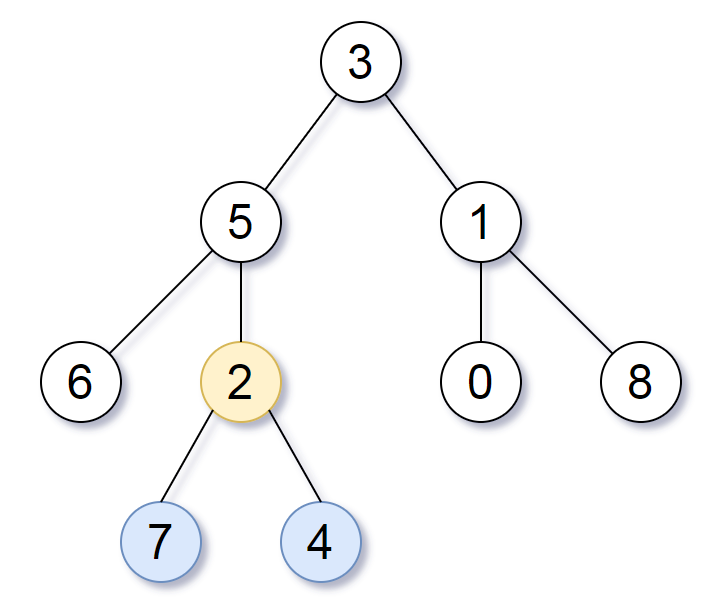


In [17]:
class Node:
    def __init__(self, val=None):
        self.left = None
        self.right = None
        self.val =  val

In [31]:

def subtreeWithAllDeepest(root):
        
        depth = {None: -1}
        
        def dfs(node,parent= None):
            if node:
                depth[node] = depth[parent]+1
                dfs(node.left, node)
                dfs(node.right, node)
        
        dfs(root)
        
        max_depth = max(depth.values())
        
        def answer(node):
            if not node or depth.get(node,None) == max_depth:
                return node
            L, R = answer(node.left) , answer(node.right)
            return node if L and R else L or R
        
        return answer(root)
            
    
    

In [33]:
root = Node(3) 
root.left = Node(5) 
root.right = Node(1) 
root.left.left = Node(6) 
root.left.right = Node(2) 
root.left.right.left = Node(7) 
root.left.right.right = Node(4) 
root.right.left = Node(8) 
root.right.right = Node(0) 

In [34]:
n= subtreeWithAllDeepest(root)
print(n.val)

2
